In [1]:
import sys; sys.path.append('..')
from osp import *
pd.options.display.max_colwidth = 200

In [2]:

comparisons = [
    (
        ('2000-2025 Philosophy', 'discipline=="Philosophy" & 2000<=year<2025'),
        ('2000-2025 Literature', 'discipline=="Literature" & 2000<=year<2025'),
    ),

    (
        ('1925-1950 Philosophy', 'discipline=="Philosophy" & 1925<=year<1950'),
        ('1925-1950 Literature', 'discipline=="Literature" & 1925<=year<1950'),
    ),

    (
        ('1950-1975 Philosophy', 'discipline=="Philosophy" & 1950<=year<1975'),
        ('1950-1975 Literature', 'discipline=="Literature" & 1950<=year<1975'),
    ),
    (
        ('1975-2000 Philosophy', 'discipline=="Philosophy" & 1975<=year<2000'),
        ('1975-2000 Literature', 'discipline=="Literature" & 1975<=year<2000'),
    ),
]
groups_train = comparisons[0]

In [3]:
df_preds, df_feats = classify_then_predict_comparisons(
    comparisons,
    num_runs=10,
    sample_size=1000,
    feat_n=50,
    feat_n_egs=10,
    verbose=False,
)

## 2000-2025 Philosophy vs 2000-2025 Literature


100%|██████████| 10/10 [00:18<00:00,  1.88s/it]



## 1925-1950 Philosophy vs 1925-1950 Literature


100%|██████████| 10/10 [00:12<00:00,  1.22s/it]



## 1950-1975 Philosophy vs 1950-1975 Literature


100%|██████████| 10/10 [00:12<00:00,  1.27s/it]



## 1975-2000 Philosophy vs 1975-2000 Literature


100%|██████████| 10/10 [00:13<00:00,  1.35s/it]


In [4]:
df_preds.comparison.value_counts()

comparison
1925-1950 Philosophy vs 1925-1950 Literature    308140
1950-1975 Philosophy vs 1950-1975 Literature    291000
2000-2025 Philosophy vs 2000-2025 Literature    273120
1975-2000 Philosophy vs 1975-2000 Literature    259940
Name: count, dtype: int64

In [5]:
# df_feats[['feature','weight','words1','egs1']]

In [6]:
# df_feats.to_excel('../data/feats_perspectival3.xlsx')


In [7]:
df_preds['text_id'] = [i.split('__')[0] for i in df_preds.index]

In [8]:
odf = (
    df_preds.rename_axis("slice_id")
    .reset_index()
    .merge(
        get_corpus_metadata()[["year", "decade", "discipline", "journal"]],
        left_on="text_id",
        right_on="id",
        how="left",
    )
)
odf
# odf.to_csv('../data/preds3.csv')

slice_id  true_label  pred_label  \
0                               lit/27742939__02  Literature  Literature   
1                               lit/23256769__01  Literature  Literature   
2                               lit/20057754__04  Literature  Literature   
3                         lit/10.1086/376659__06  Literature  Literature   
4        lit/10.5699/modelangrevi.108.3.0863__02  Literature  Literature   
...                                          ...         ...         ...   
1132195                 phil/10.2307/4544337__03  Philosophy  Philosophy   
1132196                           lit/459015__01  Literature  Literature   
1132197                         lit/27760277__03  Literature  Literature   
1132198                         lit/30031939__01  Literature  Literature   
1132199                 phil/10.2307/2025409__04  Philosophy  Philosophy   

            prob1     prob2               test_label  confidence  correct  \
0        0.999730  0.000270  Literature / Philosophy    0.999730        1   
1        0.683887  0.316113  Literature / Philosophy    0.683887        1   
2        0.996715  0.003285  Literature / Philosophy    0.996715        1   
3        0.996696  0.003304  Literature / Philosophy    0.996696        1   
4        0.971651  0.028349  Literature / Philosophy    0.971651        1   
...           ...       ...                      ...         ...      ...   
1132195  0.432908  0.567092  Literature / Philosophy         NaN        1   
1132196  0.888372  0.111628  Literature / Philosophy         NaN        1   
1132197  0.937254  0.062746  Literature / Philosophy         NaN        1   
1132198  0.983166  0.016834  Literature / Philosophy         NaN        1   
1132199  0.000042  0.999958  Literature / Philosophy         NaN        1   

         accuracy  support  run predict_type  \
0          0.9265   2000.0    0           cv   
1          0.9265   2000.0    0           cv   
2          0.9265   2000.0    0           cv   
3          0.9265   2000.0    0           cv   
4          0.9265   2000.0    0           cv   
...           ...      ...  ...          ...   
1132195       NaN      NaN    9       unseen   
1132196       NaN      NaN    9       unseen   
1132197       NaN      NaN    9       unseen   
1132198       NaN      NaN    9       unseen   
1132199       NaN      NaN    9       unseen   

                                           comparison  \
0        2000-2025 Philosophy vs 2000-2025 Literature   
1        2000-2025 Philosophy vs 2000-2025 Literature   
2        2000-2025 Philosophy vs 2000-2025 Literature   
3        2000-2025 Philosophy vs 2000-2025 Literature   
4        2000-2025 Philosophy vs 2000-2025 Literature   
...                                               ...   
1132195  1975-2000 Philosophy vs 1975-2000 Literature   
1132196  1975-2000 Philosophy vs 1975-2000 Literature   
1132197  1975-2000 Philosophy vs 1975-2000 Literature   
1132198  1975-2000 Philosophy vs 1975-2000 Literature   
1132199  1975-2000 Philosophy vs 1975-2000 Literature   

                                     text_id  year  decade  discipline  \
0                               lit/27742939  2009    2000  Literature   
1                               lit/23256769  2012    2010  Literature   
2                               lit/20057754  2002    2000  Literature   
3                         lit/10.1086/376659  2003    2000  Literature   
4        lit/10.5699/modelangrevi.108.3.0863  2013    2010  Literature   
...                                      ...   ...     ...         ...   
1132195                 phil/10.2307/4544337  1939    1930  Philosophy   
1132196                           lit/459015  1941    1940  Literature   
1132197                         lit/27760277  2009    2000  Literature   
1132198                         lit/30031939  2000    2000  Literature   
1132199                 phil/10.2307/2025409  1979    1970  Philosophy   

                                         journal  


comparison  discipline  year  decade  \
0    2000-2025 Philosophy vs 2000-2025 Literature  Literature  2017    2010   
1    2000-2025 Philosophy vs 2000-2025 Literature  Literature  1954    1950   
2    1925-1950 Philosophy vs 1925-1950 Literature  Philosophy  1931    1930   
3    1975-2000 Philosophy vs 1975-2000 Literature  Literature  1954    1950   
4    1975-2000 Philosophy vs 1975-2000 Literature  Philosophy  2018    2010   
..                                            ...         ...   ...     ...   
856  1975-2000 Philosophy vs 1975-2000 Literature  Philosophy  1932    1930   
857  2000-2025 Philosophy vs 2000-2025 Literature  Philosophy  1927    1920   
858  2000-2025 Philosophy vs 2000-2025 Literature  Philosophy  1928    1920   
859  2000-2025 Philosophy vs 2000-2025 Literature  Philosophy  1932    1930   
860  2000-2025 Philosophy vs 2000-2025 Literature  Philosophy  1935    1930   

    predict_type        mean    stderr  count  
0             cv  100.000000  0.000000     67  
1         unseen   99.250000  0.003052    800  
2         unseen   98.785425  0.006984    247  
3         unseen   98.125000  0.004799    800  
4         unseen   98.113208  0.001869   5300  
..           ...         ...       ...    ...  
856       unseen   53.875000  0.017636    800  
857       unseen   53.571429  0.018863    700  
858       unseen   53.058824  0.017128    850  
859       unseen   52.250000  0.017671    800  
860       unseen   47.402597  0.018006    770  

[861 rows x 8 columns]

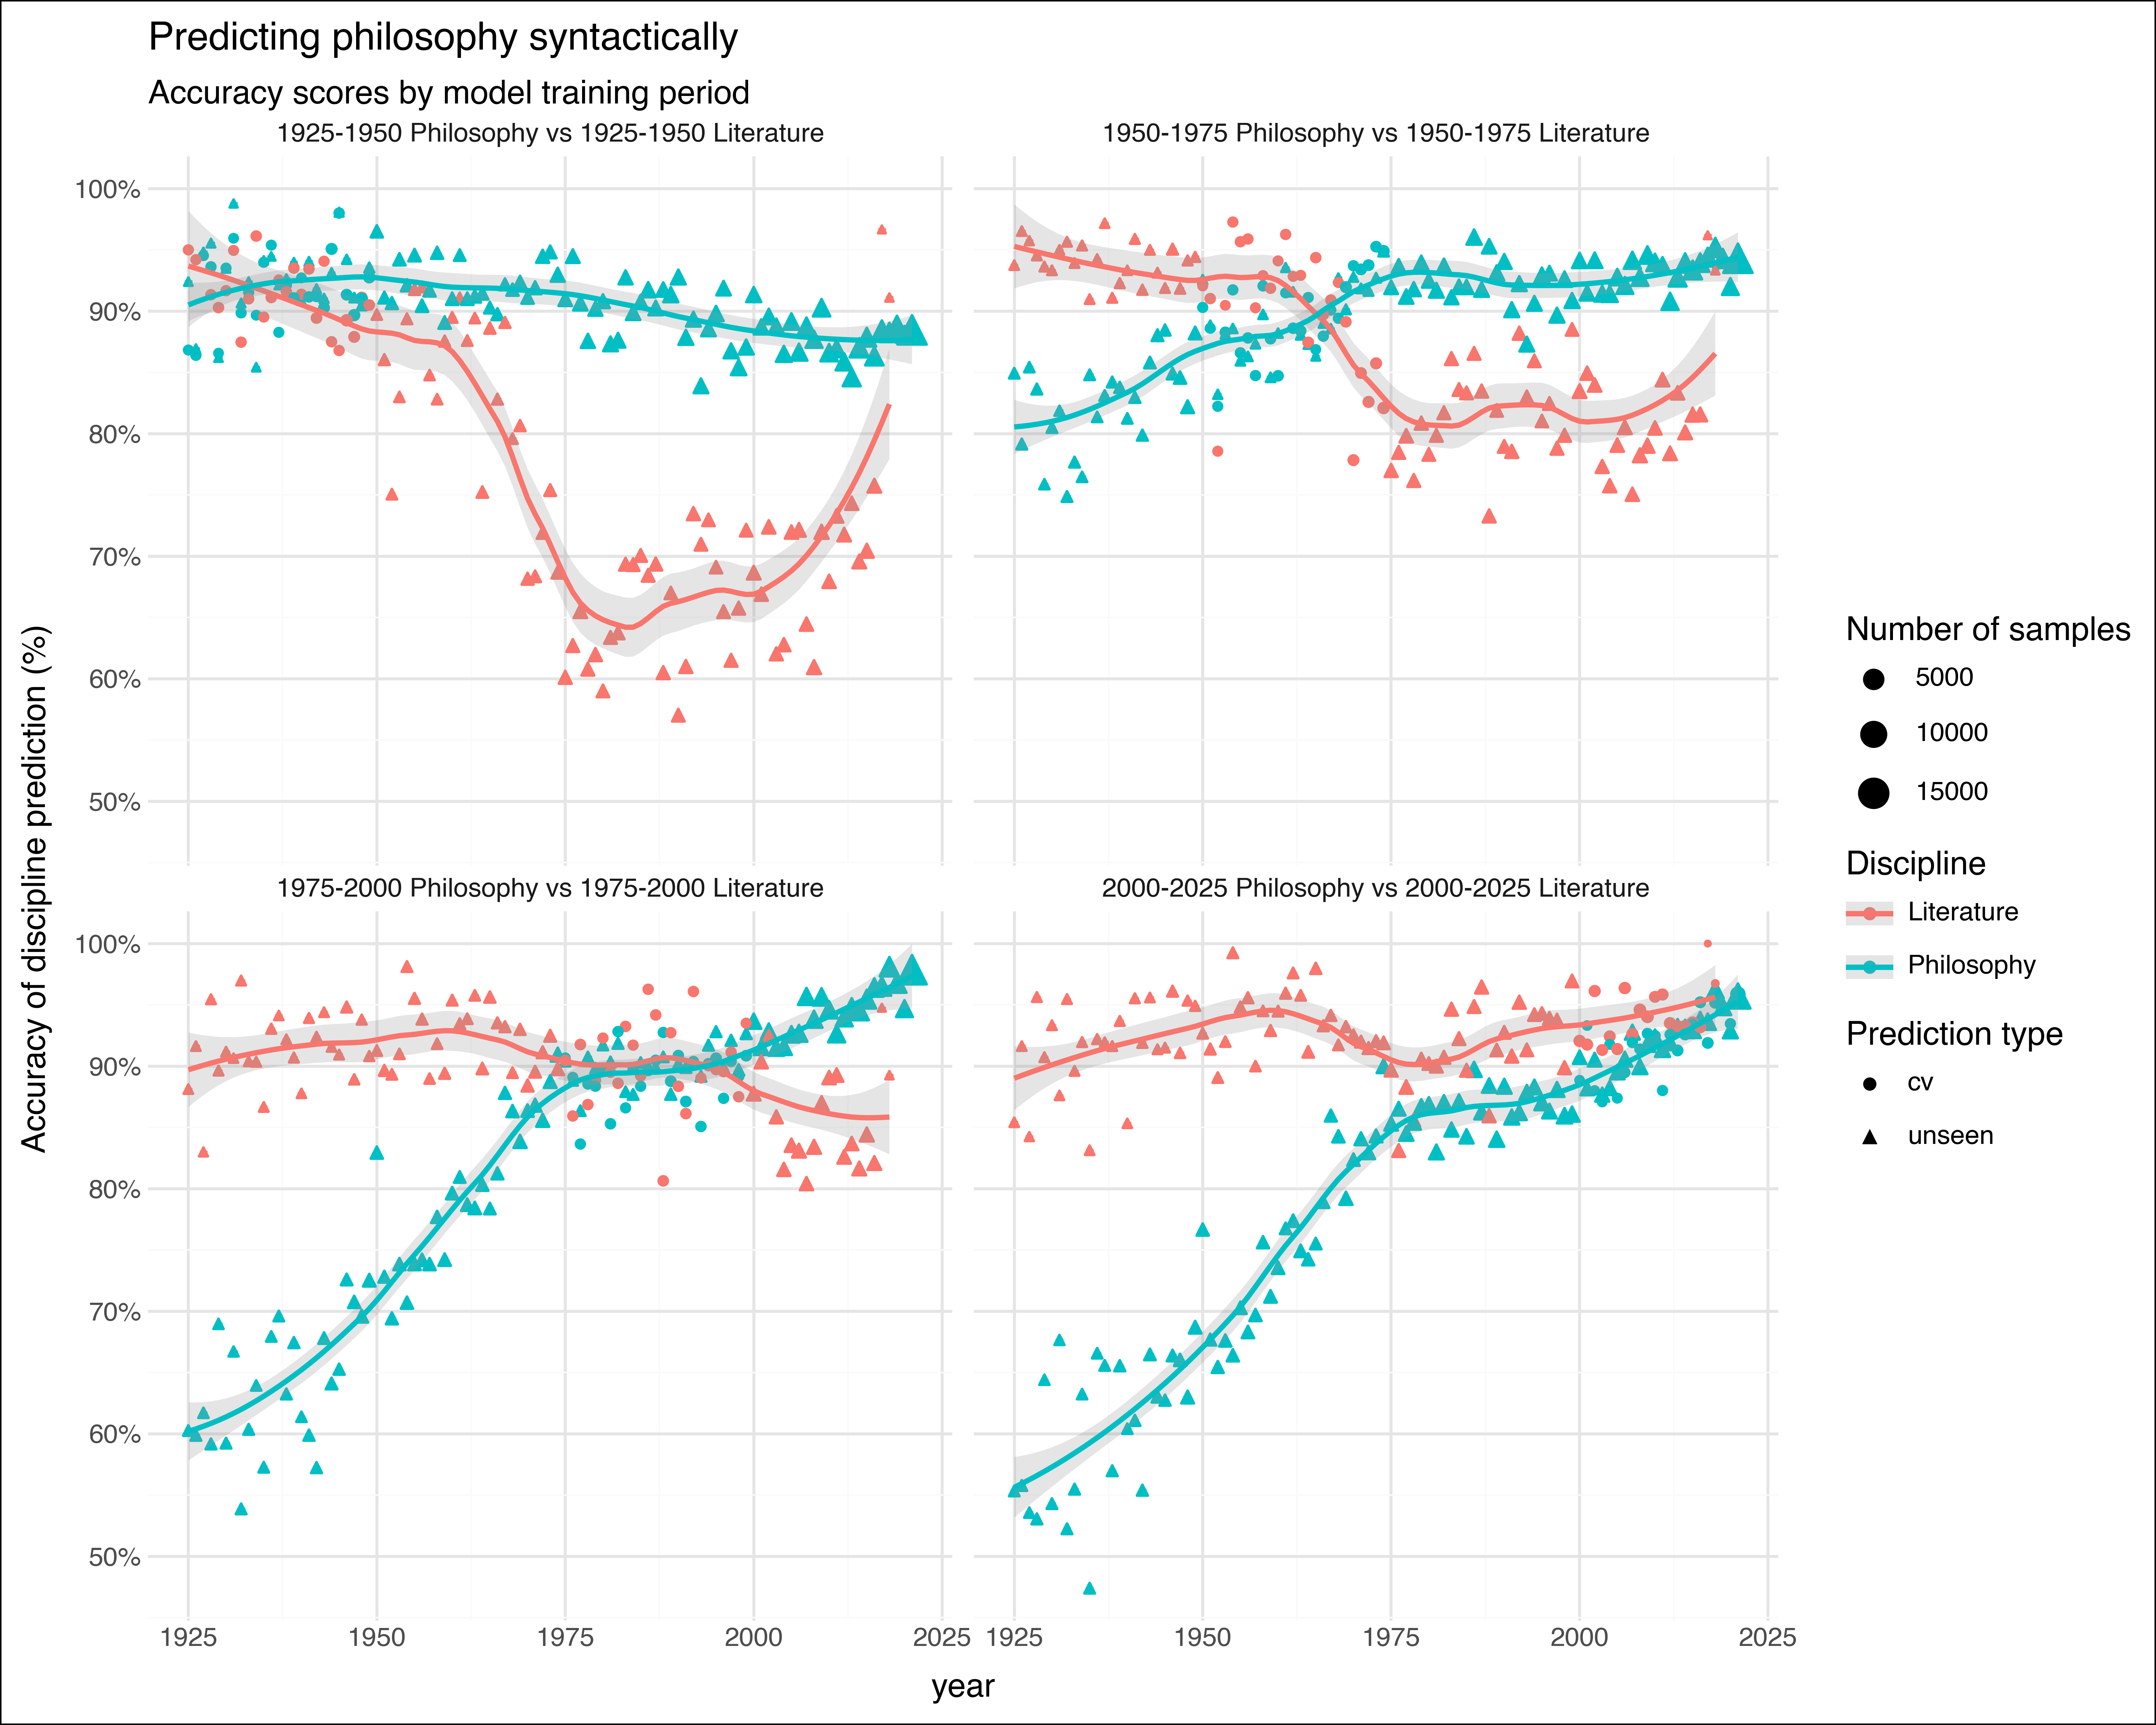

In [ ]:
def plot_preds(figdf, **labs):
    fig = (
        p9.ggplot(
            figdf,
            p9.aes(x='year', y='mean', color='discipline'),
        )
        + p9.geom_errorbar(p9.aes(ymin='mean-stderr', ymax='mean+stderr'), width=1, alpha=0.75)
        + p9.geom_point(p9.aes(y='mean',size='count',shape='predict_type'))
        + p9.facet_wrap('comparison')
        + p9.theme_minimal()
        + p9.scale_size_continuous(range=(.5, 5))
        + p9.scale_y_continuous(labels=lambda l: [f'{int(v)}%' for v in l])
        + p9.geom_smooth(method='loess', span=0.5, alpha=0.25, size=1)
        + p9.labs(**labs)
        + p9.theme(
            plot_background=p9.element_rect(fill='white'),
            plot_title=p9.element_text(ha='left',size=13),
            plot_subtitle=p9.element_text(ha='left',size=11),
        )
    )
    return fig

figdf = get_avgs_df(odf,['comparison','discipline','year','decade','predict_type'],y='correct').reset_index()
figdf['mean']*=100

fig = plot_preds(
    figdf, 
    title="Predicting philosophy syntactically", 
    y="Accuracy of discipline prediction (%)",
    subtitle="Accuracy scores by model training period",
    size='Number of samples',
    shape='Prediction type',
    color='Discipline',
)
fig.save('../figures/preds_by_comparison.png')
fig

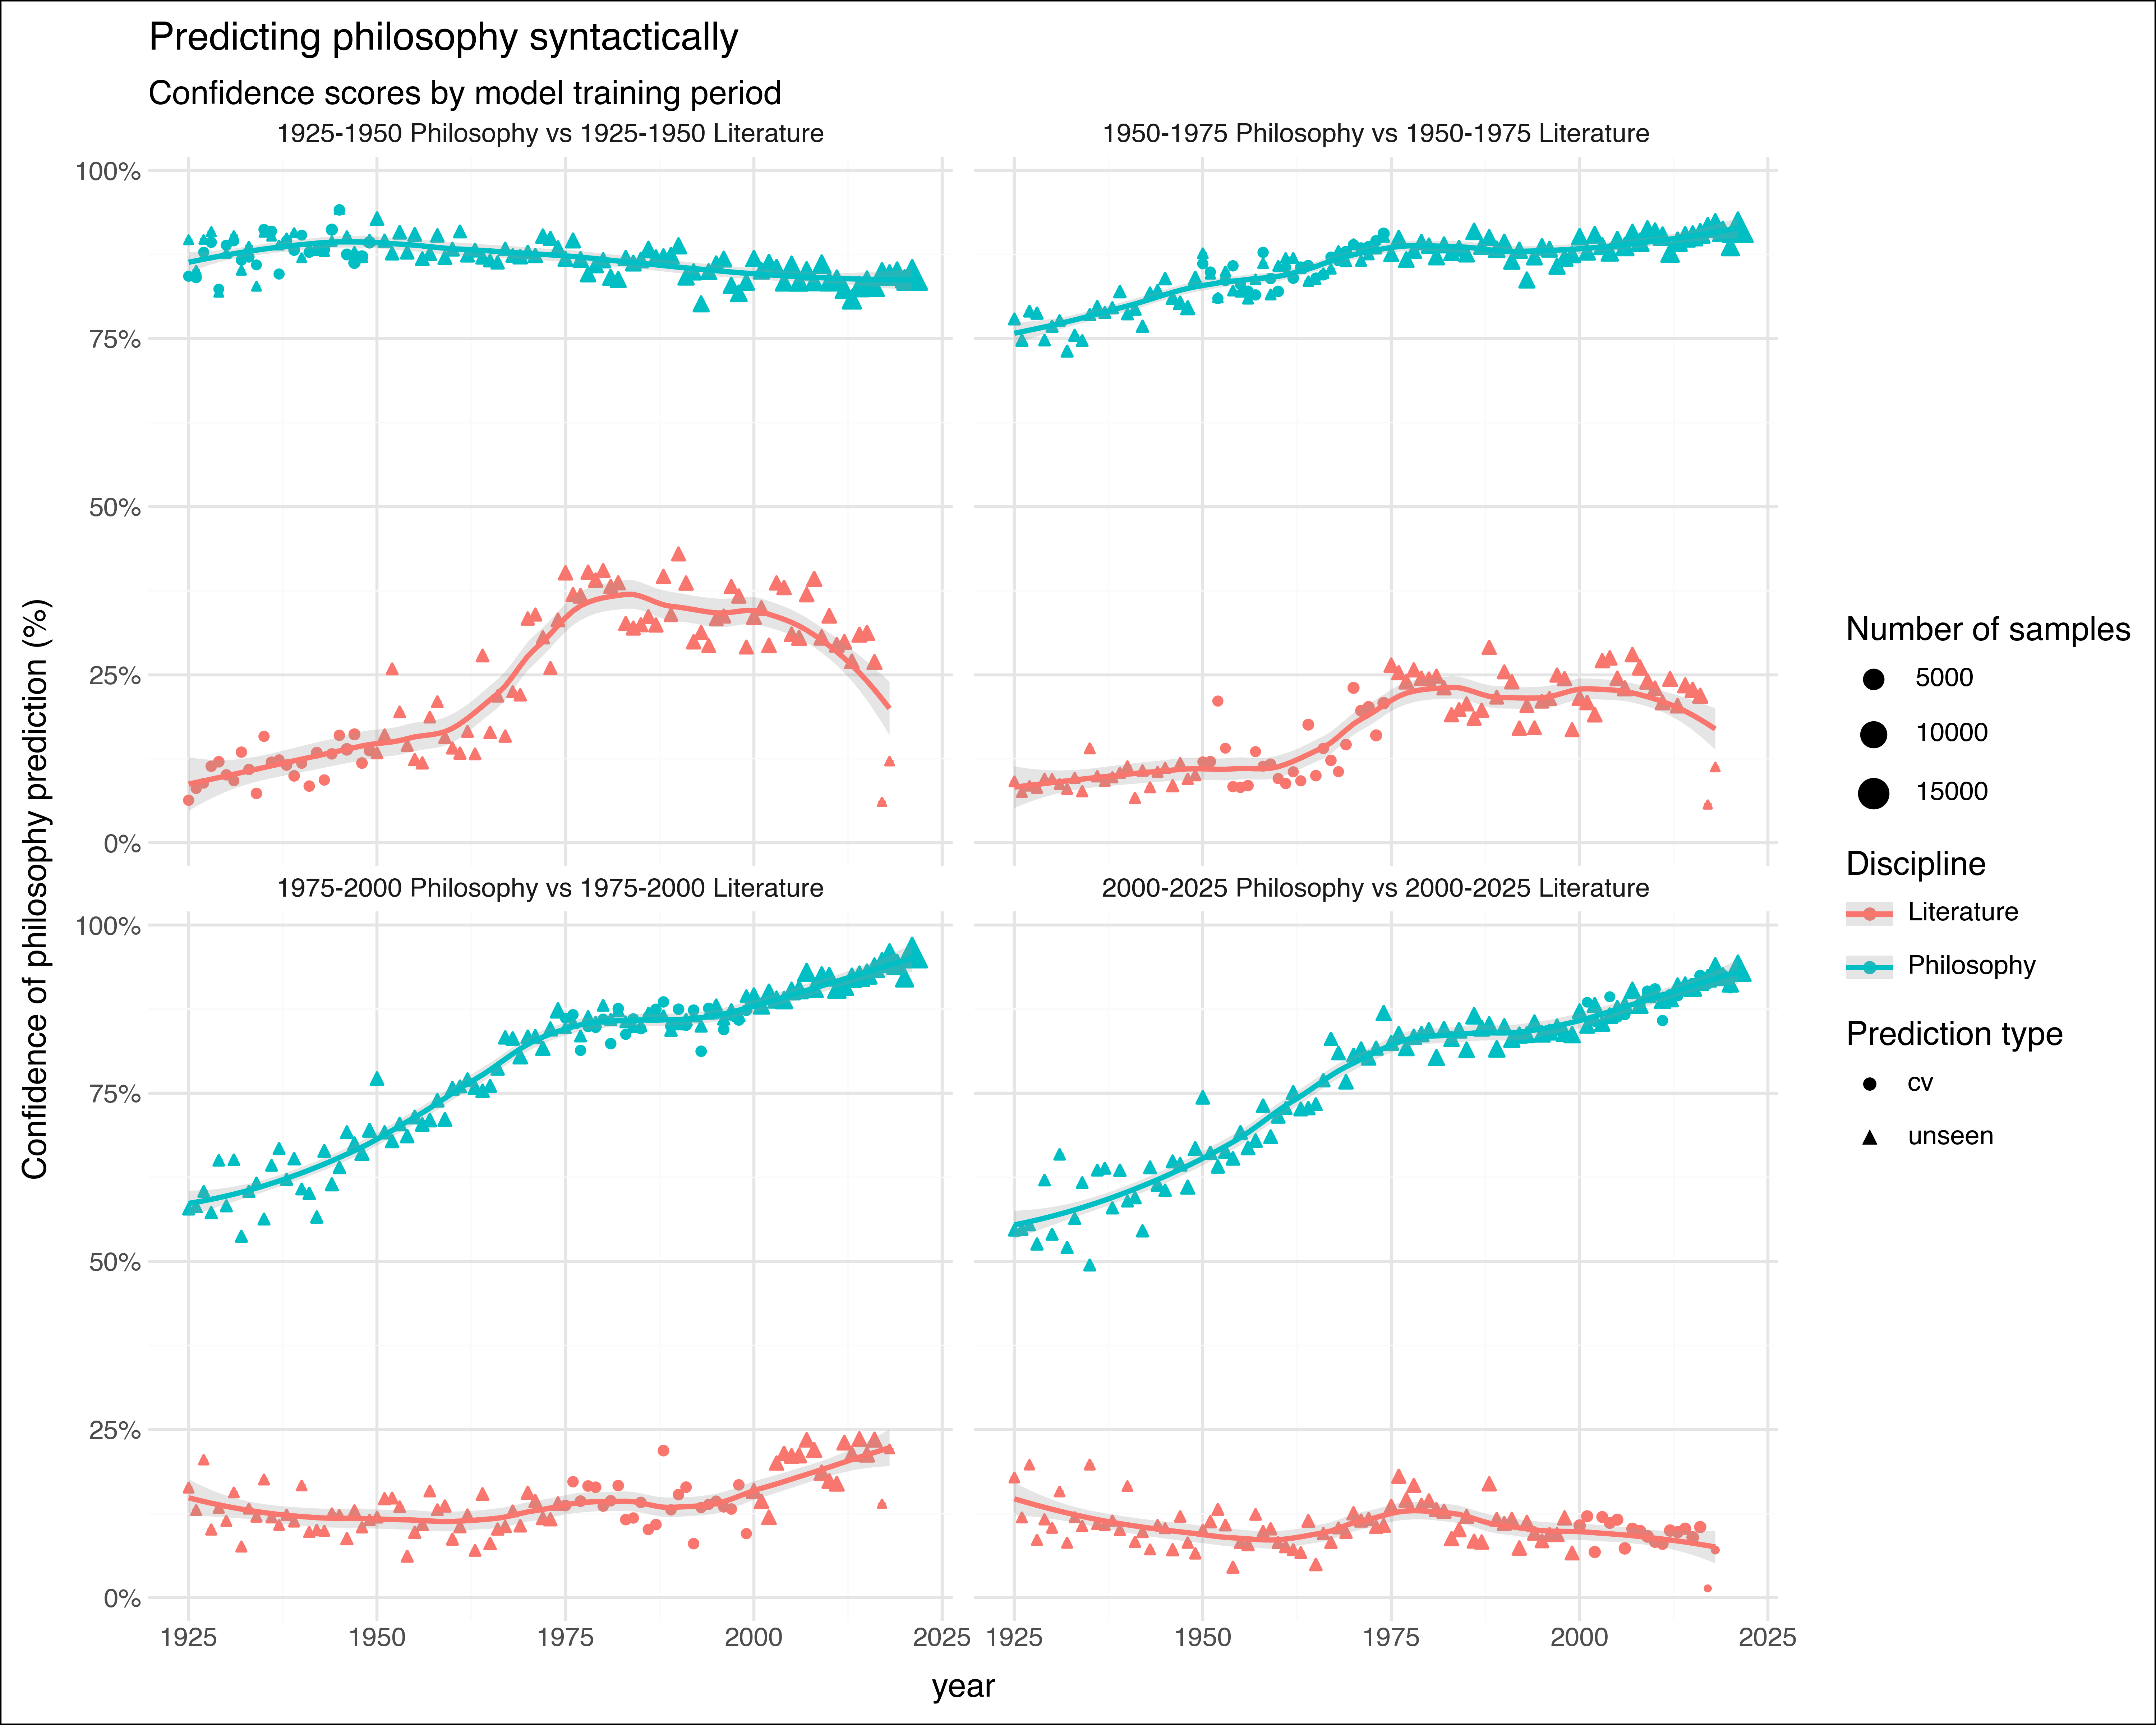

In [42]:
figdf = get_avgs_df(odf,['comparison','discipline','year','decade','predict_type'],y='prob2').reset_index()
figdf['mean']*=100

fig = plot_preds(
    figdf, 
    title="Predicting philosophy syntactically", 
    y="Confidence of philosophy prediction (%)",
    subtitle="Confidence scores by model training period",
    size='Number of samples',
    shape='Prediction type',
    color='Discipline',
)
fig.save('../figures/preds_by_comparison_prob.png')
fig# !pip install scikit-misc

In [12]:
stopp

NameError: name 'stopp' is not defined

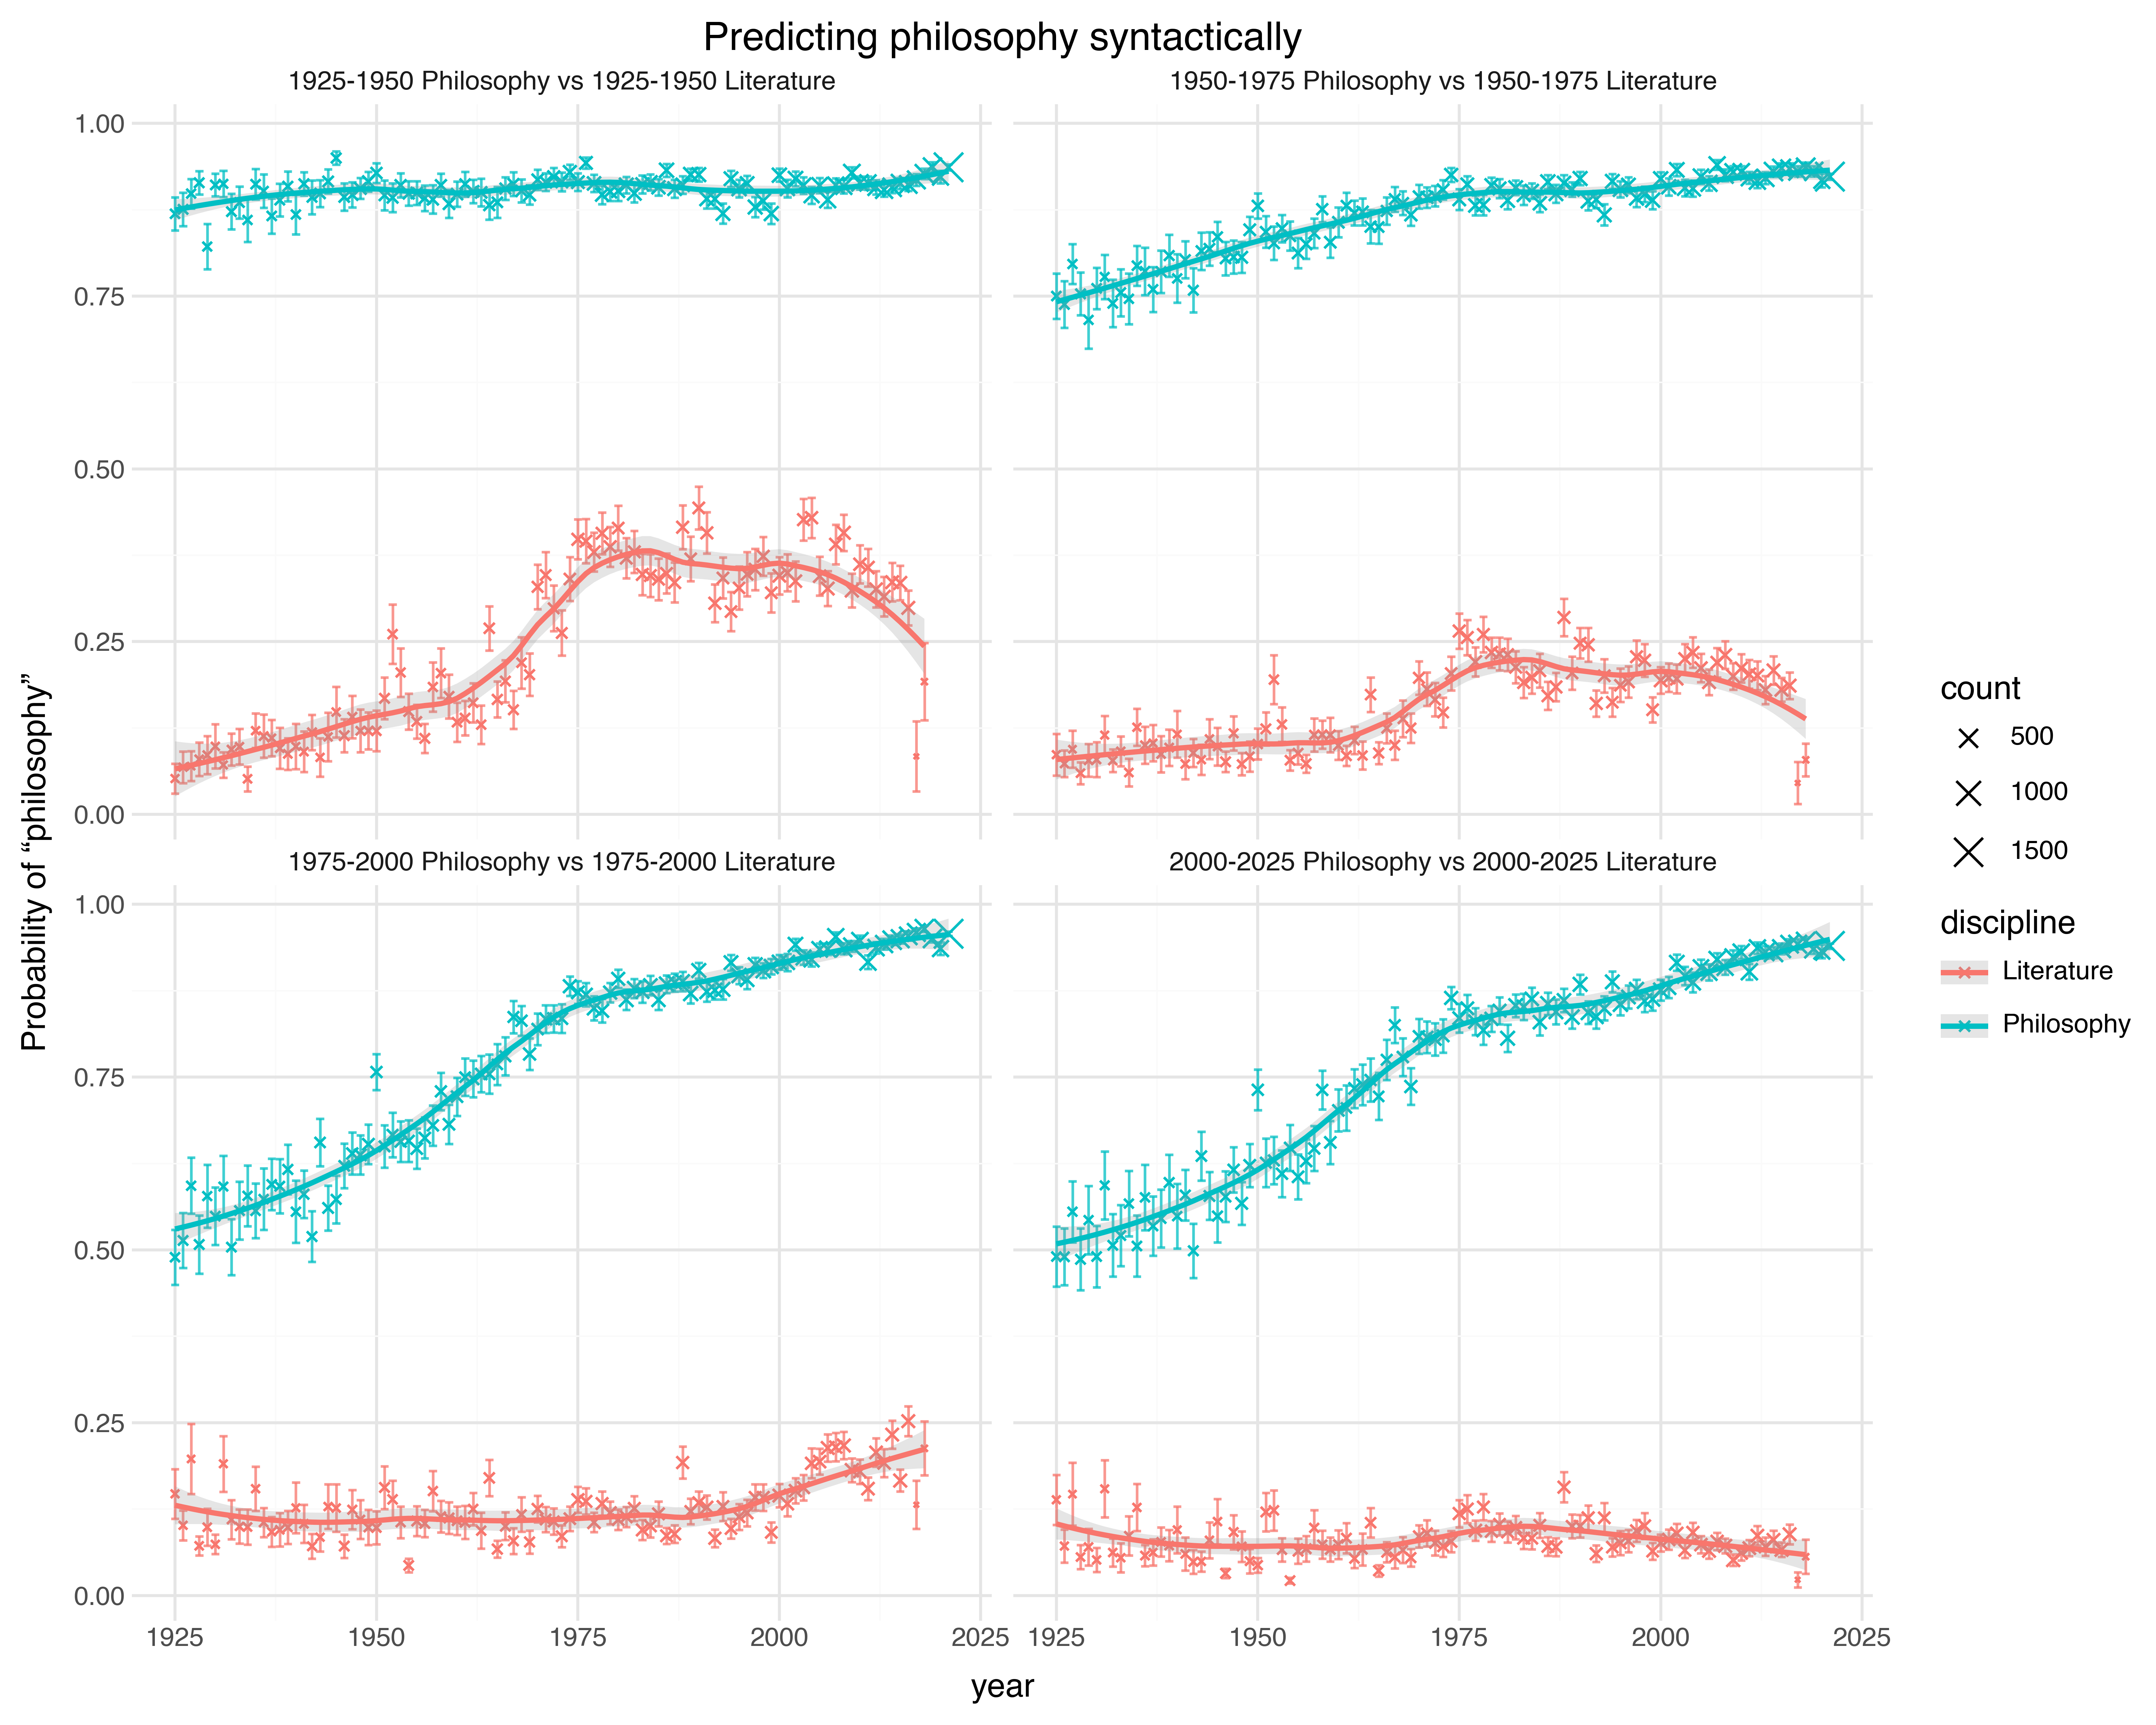

In [ ]:
figdf = get_avgs_df(odf,y='prob2').reset_index()
plot_avgs_df(figdf, title="Predicting philosophy syntactically", y="Probability of “philosophy”")

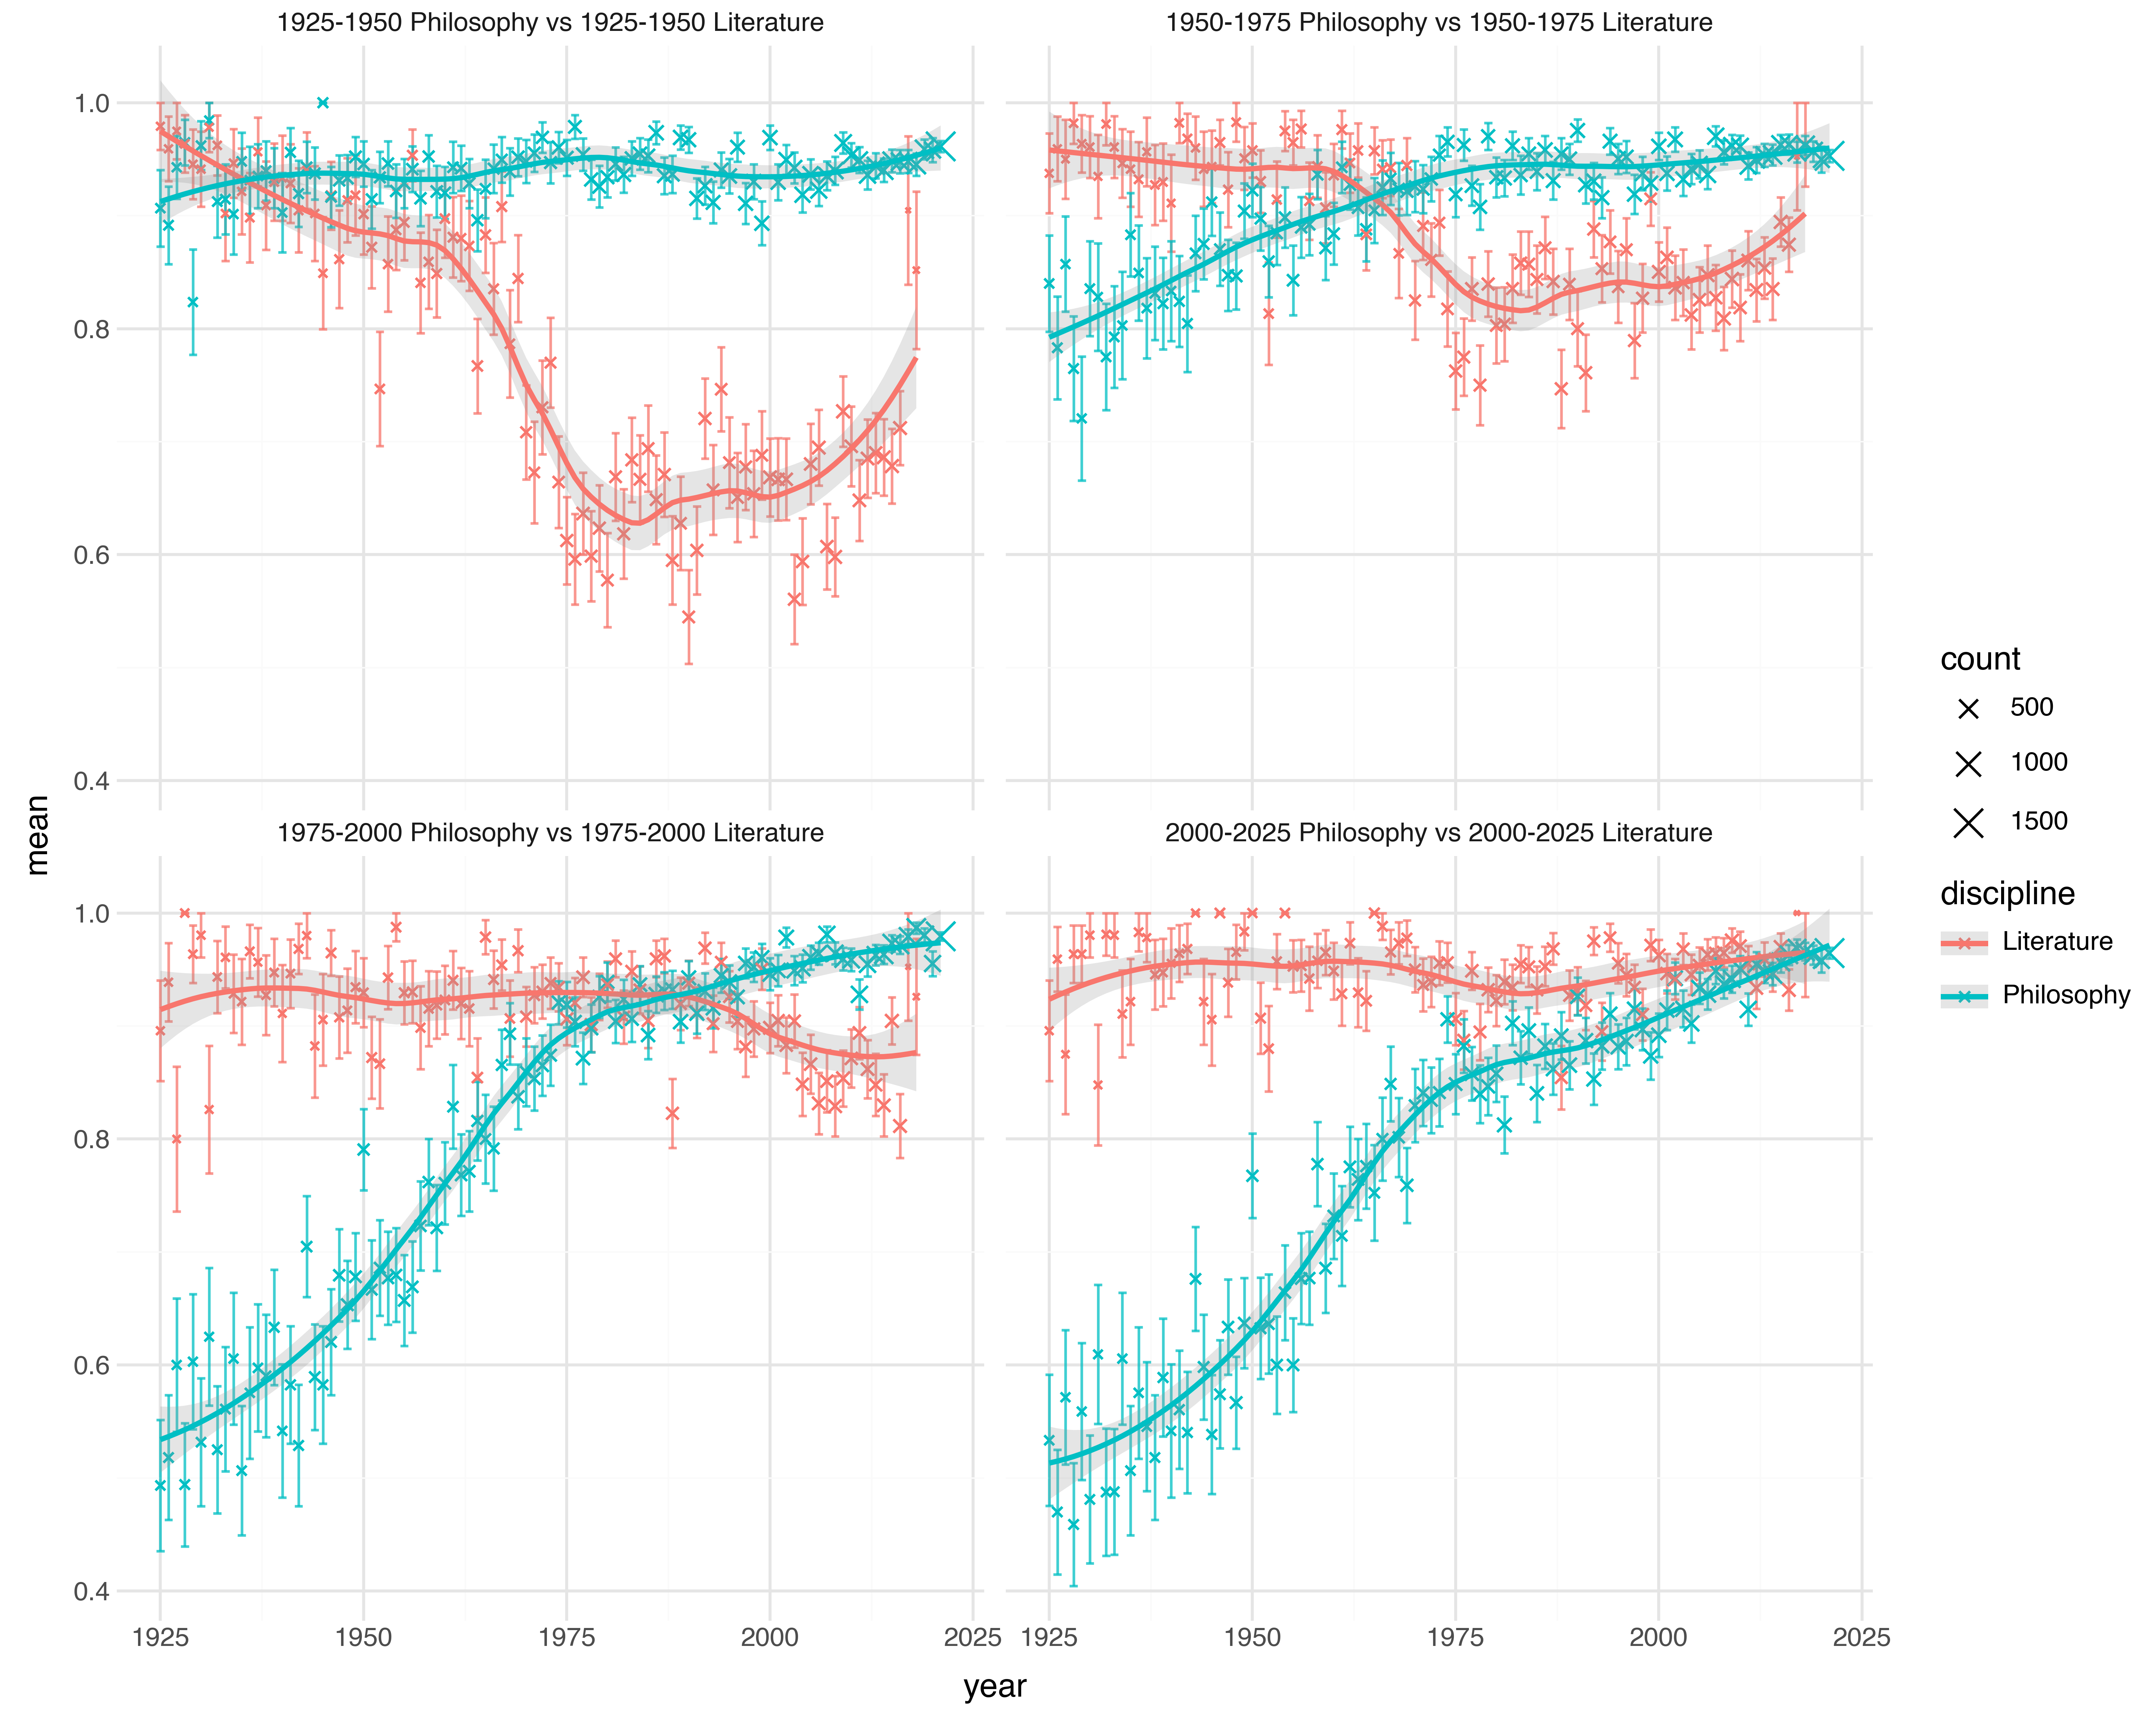

In [ ]:
figdf = get_avgs_df(odf,y='correct').reset_index()
plot_avgs_df(figdf)

In [ ]:
dfx=df_feats.groupby('feature').mean(numeric_only=True).sort_values('weight', ascending=False)

In [ ]:
dfx.tail(20)

weight  run    fpk1    fpk2  odds_ratio       sum1  \
feature                                                                  
deprel_obj       -0.150373  0.0  37.500  38.400       0.975   53499.00   
deprel_iobj      -0.158181  0.0   0.725   1.100       0.675    1003.25   
pos_WRB          -0.178985  0.0   3.825   3.375       1.150    5582.25   
pos_RB           -0.180454  0.0  49.775  43.625       1.125   68665.75   
pos_,            -0.184004  0.0     NaN     NaN         NaN        NaN   
pos_VBN          -0.187070  0.0  23.225  24.325       0.975   30718.50   
ttr              -0.239154  0.0     NaN     NaN         NaN        NaN   
deprel_root      -0.255013  0.0  37.150  36.650       1.025   51508.00   
deprel_dep       -0.255596  0.0   0.350   0.600       0.625     537.75   
pos_NFP          -0.261477  0.0   0.275   0.125       3.200     493.75   
pos_UH           -0.398712  0.0   0.625   0.950       0.750     860.50   
pos_TO           -0.410759  0.0  14.875  12.300       1.225   20788.50   
deprel_aux       -0.435036  0.0  24.525  18.775       1.325   33608.75   
pos_``           -0.486365  0.0     NaN     NaN         NaN        NaN   
deprel_cc        -0.511775  0.0  31.400  34.925       0.900   40137.25   
deprel_nsubj     -0.551434  0.0  66.975  61.075       1.100   93318.00   
pos_NNP          -0.581581  0.0  17.400  46.350       0.375   25574.75   
deprel_nmod:poss -0.699630  0.0  14.325  24.675       0.600   19161.00   
deprel_det       -1.178316  0.0  96.900  98.625       1.000  130857.00   
ttr_recog        -1.517018  0.0     NaN     NaN         NaN        NaN   

                      sum2  mdw_rank  mdw1_rank  mdw2_rank  feat1_rank  \
feature                                                                  
deprel_obj        26396.75     85.00      57.25      40.50       63.00   
deprel_iobj         736.00     30.00      81.25      16.50       73.25   
pos_WRB            2305.75     68.00      35.25      62.50       73.75   
pos_RB            29767.50     64.50      34.50      63.25       67.00   
pos_,                  NaN       NaN        NaN        NaN       60.75   
pos_VBN           16304.25     87.25      58.00      39.75       73.25   
ttr                    NaN       NaN        NaN        NaN       71.75   
deprel_root       24552.50     78.75      52.50      45.25       69.00   
deprel_dep          380.25     31.75      81.00      16.75       80.25   
pos_NFP              65.50     28.25      15.25      82.50       73.00   
pos_UH              568.25     53.00      73.25      24.50       87.75   
pos_TO             8485.00     53.50      27.75      70.00       80.75   
deprel_aux        12457.00     46.50      24.75      73.00       92.75   
pos_``                 NaN       NaN        NaN        NaN       77.25   
deprel_cc         23864.00     64.25      62.75      35.00       77.50   
deprel_nsubj      41564.75     77.00      42.00      55.75       91.50   
pos_NNP           30032.25     10.50      94.00       3.75       93.75   
deprel_nmod:poss  16712.25     20.75      86.75      11.00       84.25   
deprel_det        67367.50     89.75      55.25      42.50      100.25   
ttr_recog              NaN       NaN        NaN        NaN       77.50   

                  feat2_rank  feat_rank  
feature                                  
deprel_obj             40.00      51.50  
deprel_iobj            29.75      60.25  
pos_WRB                29.25      59.25  
pos_RB                 36.00      48.25  
pos_,                  42.25      46.25  
pos_VBN                29.75      58.75  
ttr                    31.25      12.50  
deprel_root            34.00      24.75  
deprel_dep             22.75      46.75  
pos_NFP                30.00      37.25  
pos_UH                 15.25      37.00  
pos_TO                 22.25      26.75  
deprel_aux             10.25      26.00  
pos_``                 25.75      52.75  
deprel_cc              25.50      13.25  
deprel_nsubj           11.50      27.75  
pos_NN

In [ ]:
dfx.head(30)

weight  run     fpk1     fpk2  odds_ratio  \
feature                                                                   
deprel_mark                 0.651207  0.0   45.650   32.850       1.375   
pos_SYM                     0.610825  0.0    0.275    0.150       2.000   
pos_MD                      0.598494  0.0   16.600   10.050       1.700   
sent_height                 0.576012  0.0      NaN      NaN         NaN   
pos_DT                      0.554924  0.0  103.200  103.100       1.000   
deprel_advmod               0.506523  0.0   54.875   48.700       1.125   
pos_VB                      0.484311  0.0   37.775   27.500       1.375   
deprel_nmod                 0.465539  0.0   53.025   56.300       0.950   
pos_NN                      0.440901  0.0  148.800  144.250       1.050   
sent_num_dependent_clauses  0.428782  0.0      NaN      NaN         NaN   
pos_''                      0.409283  0.0      NaN      NaN         NaN   
pos_CC                      0.396368  0.0   31.925   35.100       0.925   
pos_JJ                      0.391065  0.0   80.375   73.200       1.100   
pos_VBZ                     0.375765  0.0   42.200   35.375       1.175   
pos_NNS                     0.371220  0.0   47.450   41.100       1.175   
pos_VBG                     0.342029  0.0   13.725   12.150       1.125   
deprel_cop                  0.323961  0.0   27.525   19.025       1.450   
pos_VBD                     0.304298  0.0    6.450   16.275       0.400   
pos_VBP                     0.299349  0.0   20.725   14.100       1.475   
pos_.                       0.298587  0.0      NaN      NaN         NaN   
deprel_ccomp                0.249626  0.0    9.325    5.450       1.750   
pos_-RRB-                   0.245155  0.0    4.175    3.100       1.325   
deprel_amod                 0.171190  0.0   64.100   63.025       1.050   
deprel_acl                  0.154758  0.0   11.200    9.125       1.225   
pos_HYPH                    0.152772  0.0    4.875    4.500       1.075   
pos_PRP$                    0.143303  0.0   10.525   16.200       0.650   
deprel_csubj:pass           0.142978  0.0    0.150    0.100       2.000   
pos_WDT                     0.135250  0.0    9.925    8.000       1.250   
pos_EX                      0.130639  0.0    2.875    1.550       1.950   
deprel_compound             0.127647  0.0   14.000   14.250       1.000   

                                 sum1       sum2  mdw_rank  mdw1_rank  \
feature                                                                 
deprel_mark                  64506.00   22465.50     40.00      19.25   
pos_SYM                        542.00      98.75     11.75      45.25   
pos_MD                       22976.00    6728.00     24.00      11.75   
sent_height                       NaN        NaN       NaN        NaN   
pos_DT                      139478.75   70369.75     92.25      52.50   
deprel_advmod                75923.25   33161.50     68.75      37.50   
pos_VB                       53054.25   18674.50     39.75      19.25   
deprel_nmod                  70886.00   38709.25     77.50      59.25   
pos_NN                      204647.50  100388.25     84.00      47.25   
sent_num_dependent_clauses        NaN        NaN       NaN        NaN   
pos_''                            NaN        NaN       NaN        NaN   
pos_CC                       40719.75   23979.00     65.25      61.00   
pos_JJ                      110524.50   50945.00     75.00      40.50   
pos_VBZ                      58297.75   24690.00     57.25      29.25   
pos_NNS                      67100.00   28435.00     61.75      33.00   
pos_VBG                      19815.00    8562.00     68.00      38.00   
deprel_cop                   37565.75   12830.50     33.00      15.25   
pos_VBD                       7829.00   10349.50      9.25      92.75   
pos_VBP                      29516.75    9690.00     31.50      14.50   
pos_.                             NaN        NaN       NaN        NaN   
deprel_ccomp           

In [ ]:
df_preds.groupby()

prob1     prob2  pred_label  true_label  \
id                                                                     
lit/20057585__05          0.521719  0.478281  Literature  Literature   
lit/27654619__02          0.779358  0.220642  Literature  Literature   
lit/40963178__02          0.387011  0.612989  Philosophy  Literature   
lit/10.1086/658327__05    0.649940  0.350060  Literature  Literature   
lit/30031962__02          0.634543  0.365457  Literature  Literature   
...                            ...       ...         ...         ...   
phil/10.2307/4544337__03  0.614292  0.385708  Literature  Philosophy   
lit/459015__01            0.742329  0.257671  Literature  Literature   
lit/27760277__03          0.542627  0.457373  Literature  Literature   
lit/30031939__01          0.598389  0.401611  Literature  Literature   
phil/10.2307/2953730__03  0.438279  0.561721  Philosophy  Philosophy   

                                       test_label predict_type  run  \
id                                                                    
lit/20057585__05          Literature / Philosophy       unseen    0   
lit/27654619__02          Literature / Philosophy       unseen    0   
lit/40963178__02          Literature / Philosophy       unseen    0   
lit/10.1086/658327__05    Literature / Philosophy       unseen    0   
lit/30031962__02          Literature / Philosophy       unseen    0   
...                                           ...          ...  ...   
phil/10.2307/4544337__03  Literature / Philosophy       unseen    9   
lit/459015__01            Literature / Philosophy       unseen    9   
lit/27760277__03          Literature / Philosophy       unseen    9   
lit/30031939__01          Literature / Philosophy       unseen    9   
phil/10.2307/2953730__03  Literature / Philosophy       unseen    9   

                                                  comparison  \
id                                                             
lit/20057585__05            C21 Philosophy vs C21 Literature   
lit/27654619__02            C21 Philosophy vs C21 Literature   
lit/40963178__02            C21 Philosophy vs C21 Literature   
lit/10.1086/658327__05      C21 Philosophy vs C21 Literature   
lit/30031962__02            C21 Philosophy vs C21 Literature   
...                                                      ...   
phil/10.2307/4544337__03  lC20 Philosophy vs lC20 Literature   
lit/459015__01            lC20 Philosophy vs lC20 Literature   
lit/27760277__03          lC20 Philosophy vs lC20 Literature   
lit/30031939__01          lC20 Philosophy vs lC20 Literature   
phil/10.2307/2953730__03  lC20 Philosophy vs lC20 Literature   

                                       text_id  
id                                              
lit/20057585__05                  lit/20057585  
lit/27654619__02                  lit/27654619  
lit/40963178__02                  lit/40963178  
lit/10.1086/658327__05      lit/10.1086/658327  
lit/30031962__02                  lit/30031962  
...                                        ...  
phil/10.2307/4544337__03  phil/10.2307/4544337  
lit/459015__01                      lit/459015  
lit/27760277__03                  lit/27760277  
lit/30031939__01                  lit/30031939  
phil/10.2307/2953730__03  phil/10.2307/2953730  

[1261240 rows x 9 columns]